### Video 2 - exercise on AB testing

From the video - https://www.youtube.com/watch?v=mAUwjSo5TJE

The first part of this exercise is to expand the analysis to compare two methods (AB testing).

We need two different priors, one for each.

Suppose that method:

X: 6/16 via pamphlet in post

Y: 10/16 via salmon and pamphlet in post

In [1]:
n_draw <- 1000000

# We need two different priors
priorX <- runif(n_draw, 0, 1)
priorY <- runif(n_draw, 0, 1)

In [2]:
gen_model <- function(rate) {
  subscribers = rbinom(n = 1, size = 16, prob = rate)
  (subscribers)
}

subscribersX <- rep(NA, n_draw)
for(i in 1:n_draw) {
  subscribersX[i] <- gen_model(priorX[i])
}
subscribersY <- rep(NA, n_draw)
for(i in 1:n_draw) {
  subscribersY[i] <- gen_model(priorY[i])
}

# Now, we only keep both priors if both match the observed data
observedX <- 6
observedY <- 10
posteriorX <- c()
posteriorY <- c()
for (i in 1:n_draw) {
    if(subscribersX[i] == observedX &&
       subscribersY[i] == observedY) {
        posteriorX <- c(posteriorX, priorX[i])
        posteriorY <- c(posteriorY, priorY[i])
    }
}

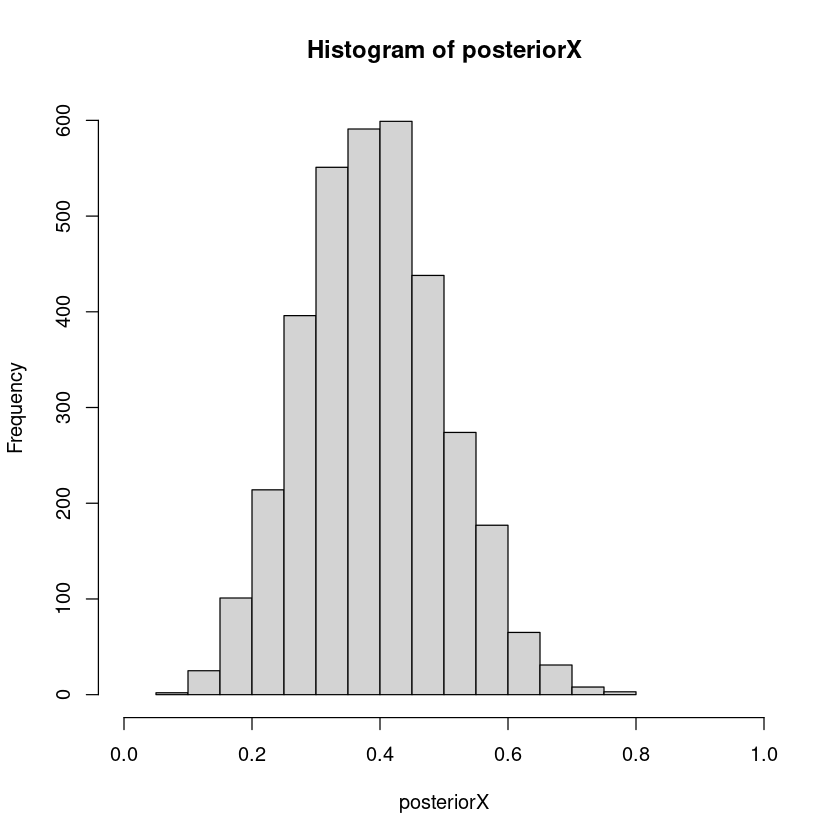

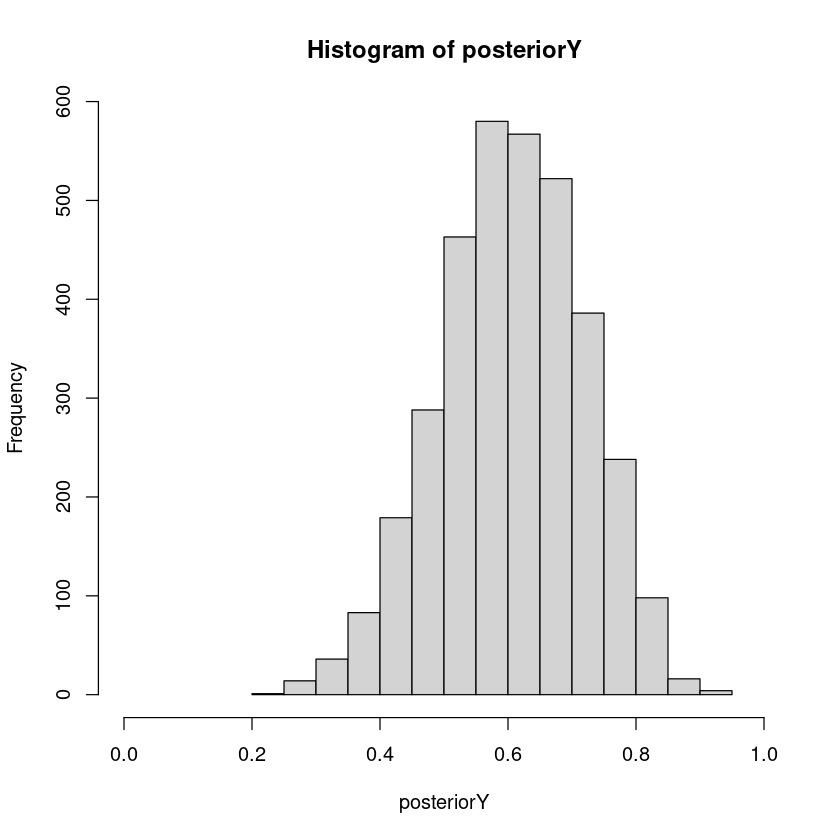

In [3]:
hist(posteriorX, xlim = c(0, 1))
hist(posteriorY, xlim = c(0, 1))

Now we can ask what the difference between these distributions is. Since they are gauranteed to be the same size, we can do:

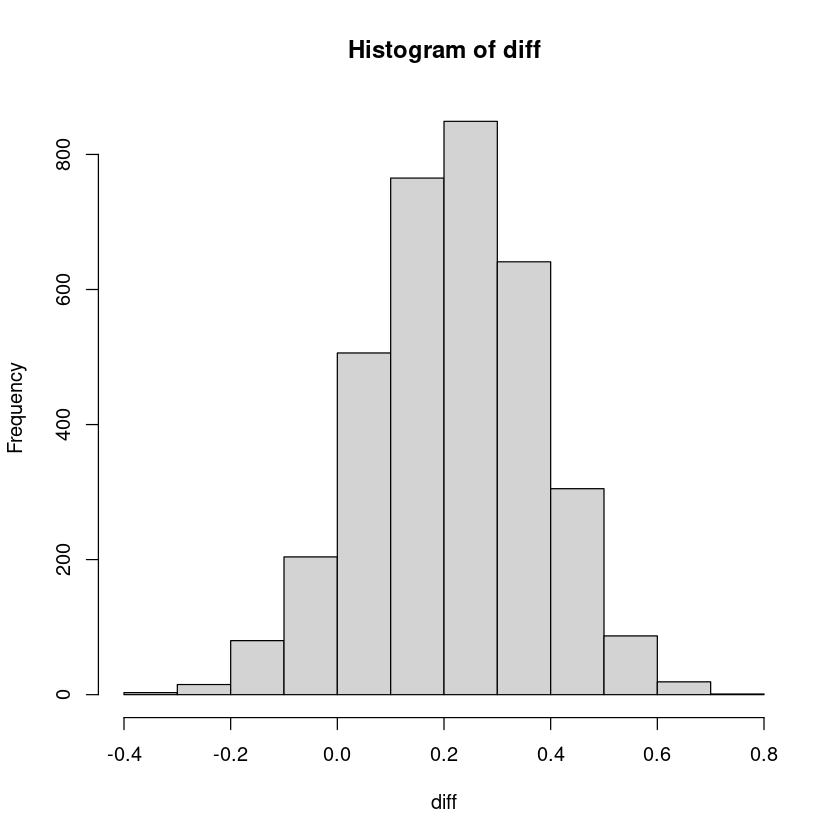

In [4]:
diff = posteriorY - posteriorX
hist(diff)

So this shows that the second method is more successful than the first.